In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple

In [42]:
def simulate_hongbao(total_amount: float, num_packets: int, multiplier: int = 2) -> List[float]:
    """Simulate one hongbao distribution"""
    remaining = total_amount
    remaining_packets = num_packets
    amounts = []
    
    for i in range(num_packets - 1):
        # Maximum possible is 2x (ideally) the average remaining
        max_possible = min((remaining * multiplier) / remaining_packets, remaining-1)
        # Random draw between 1 and max_possible
        amount = np.random.uniform(1, max_possible)
        amounts.append(amount)
        remaining -= amount
        remaining_packets -= 1
    
    # Last packet gets remainder
    amounts.append(remaining)
    return amounts

def run_monte_carlo(total_amount: float, num_packets: int, num_trials: int, multiplier: int = 2) -> np.ndarray:
    """Run multiple trials and return results matrix"""
    results = np.zeros((num_trials, num_packets))
    for i in range(num_trials):
        results[i, :] = simulate_hongbao(total_amount, num_packets, multiplier)
    return results

In [70]:
def plot_results(results: np.ndarray, multiplier: int):
    # Create visualization
    plt.figure(figsize=(15, 10))

    num_trials = len(results)
    num_packets = len(results[0])
    total_money = sum(results[0])

    # Main scatter plot
    plt.subplot(2, 1, 1)
    positions = np.repeat(range(1, num_packets + 1), num_trials)
    amounts = results.flatten()
    plt.scatter(positions, amounts, alpha=0.1, color='blue')
    
    # Add box plots overlay
    plt.boxplot(results, whis=[5, 95])


    second_line = f'{num_trials} trials | {num_packets} packets | {total_money} money | {multiplier}x mean multiplier'
    plt.title(f'Hongbao Distribution Monte Carlo Analysis\n({second_line})')
    plt.xlabel('Draw Position')
    plt.ylabel('Amount')
    
    # Add statistics
    plt.subplot(2, 1, 2)
    stats = {
        'mean': np.mean(results, axis=0),
        'median': np.median(results, axis=0),
        'std': np.std(results, axis=0),
        'min': np.min(results, axis=0),
        'max': np.max(results, axis=0),
        '25th': np.percentile(results, 25, axis=0),
        '75th': np.percentile(results, 75, axis=0)
    }
    
    # Create table of statistics
    cell_text = []
    for metric in ['mean', 'median', 'std', 'min', 'max', '25th', '75th']:
        cell_text.append([f'{val:.2f}' for val in stats[metric]])
    
    plt.table(cellText=cell_text,
              rowLabels=['Mean', 'Median', 'Std Dev', 'Min', 'Max', '25th %ile', '75th %ile'],
              colLabels=[f'Pos {i+1}' for i in range(num_packets)],
              loc='center',
              cellLoc='center')
    plt.axis('off')
    
    plt.tight_layout()
    
    # Print additional insights
    print("\nKey insights:")
    print(f"- Position with highest average: {np.argmax(stats['mean'])+1}")
    print(f"- Position with most variability: {np.argmax(stats['std'])+1}")
    print(f"- Position with highest maximum: {np.argmax(stats['max'])+1}")
    print(f"- Position with lowest minimum: {np.argmin(stats['min'])+1}")
    
    # Calculate probability of getting highest amount by position
    max_by_trial = np.argmax(results, axis=1)
    prob_highest = np.bincount(max_by_trial) / num_trials
    print("\nProbability of getting highest amount by position:")
    for pos, prob in enumerate(prob_highest):
        print(f"Position {pos+1}: {prob:.2%}")


Key insights:
- Position with highest average: 3
- Position with most variability: 2
- Position with highest maximum: 3
- Position with lowest minimum: 1

Probability of getting highest amount by position:
Position 1: 36.17%
Position 2: 31.96%
Position 3: 31.87%


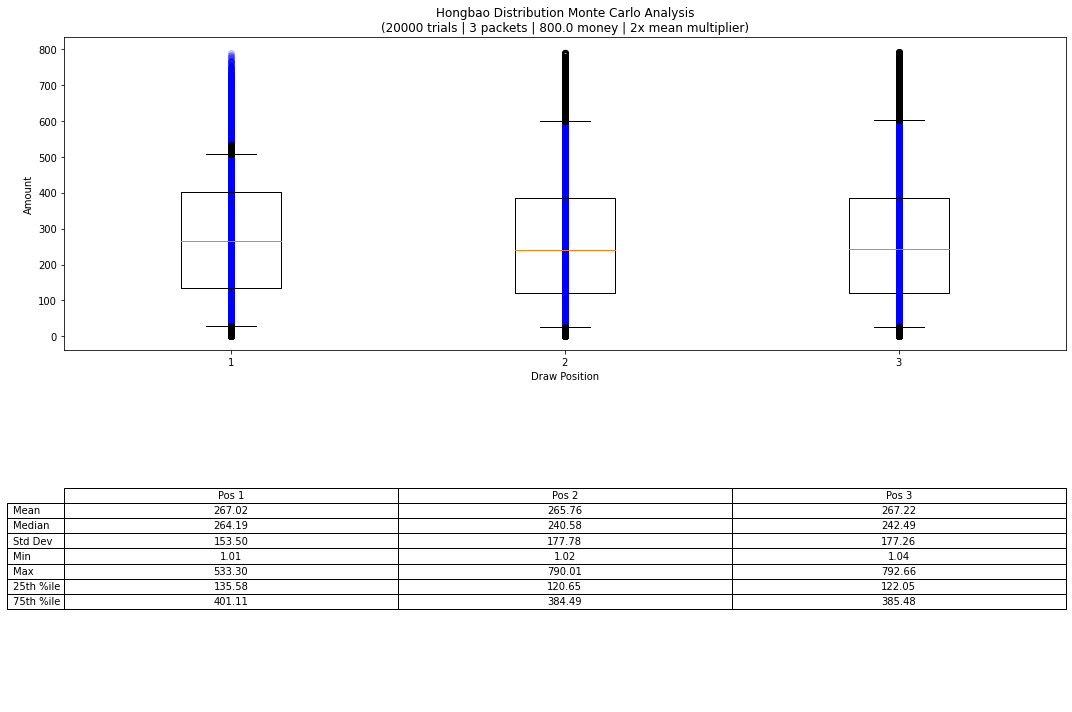

In [74]:
# Run simulation
TOTAL_AMOUNT = 800
NUM_PACKETS = 3
MULTIPLIER = 2
NUM_TRIALS = 20000

results = run_monte_carlo(TOTAL_AMOUNT, NUM_PACKETS, NUM_TRIALS, MULTIPLIER)
plot_results(results, MULTIPLIER)


Variance Analysis by Multiplier:

Multiplier 1.5x:
Total Variance: 149.60
Max Amount: 87.70
Min Amount: 1.00

Multiplier 2.0x:
Total Variance: 160.47
Max Amount: 88.72
Min Amount: 0.00

Multiplier 3.0x:
Total Variance: 326.20
Max Amount: 123.40
Min Amount: -37.01

Multiplier 4.0x:
Total Variance: 572.56
Max Amount: 162.54
Min Amount: -73.00


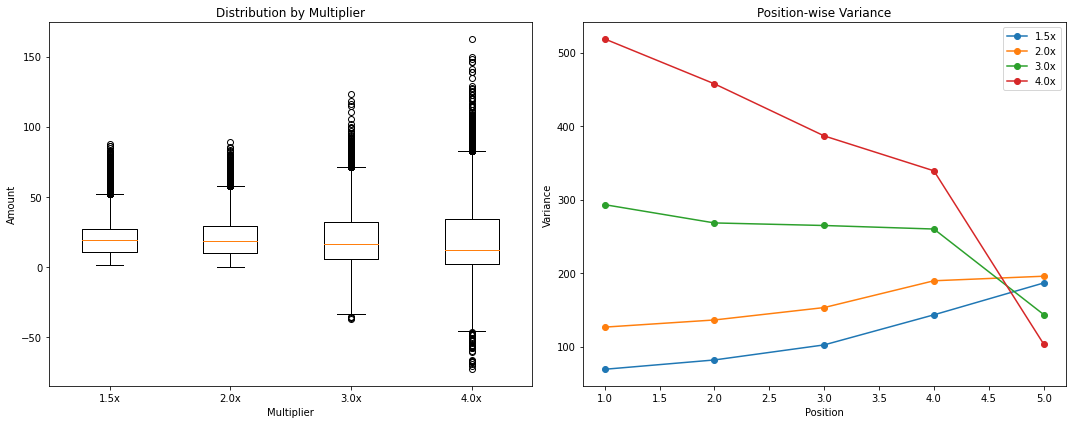

In [77]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_hongbao(total_amount: float, num_packets: int, multiplier: float) -> list:
    remaining = total_amount
    remaining_packets = num_packets
    amounts = []
    
    for i in range(num_packets - 1):
        # Use variable multiplier for max possible draw
        max_possible = (remaining * multiplier) / remaining_packets
        amount = np.random.uniform(1, max_possible)
        amounts.append(amount)
        remaining -= amount
        remaining_packets -= 1
    
    amounts.append(remaining)
    return amounts

# Simulation parameters
TOTAL_AMOUNT = 100
NUM_PACKETS = 5
NUM_TRIALS = 10000
MULTIPLIERS = [1.5, 2.0, 3.0, 4.0]

# Run simulations for different multipliers
all_results = {}
for mult in MULTIPLIERS:
    results = np.array([simulate_hongbao(TOTAL_AMOUNT, NUM_PACKETS, mult) 
                       for _ in range(NUM_TRIALS)])
    all_results[mult] = results

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Box plot comparison
boxplot_data = [all_results[m].flatten() for m in MULTIPLIERS]
ax1.boxplot(boxplot_data, labels=[f'{m}x' for m in MULTIPLIERS])
ax1.set_title('Distribution by Multiplier')
ax1.set_xlabel('Multiplier')
ax1.set_ylabel('Amount')

# Plot 2: Variance comparison
variances = [np.var(all_results[m], axis=0) for m in MULTIPLIERS]
positions = range(1, NUM_PACKETS + 1)
for mult, var in zip(MULTIPLIERS, variances):
    ax2.plot(positions, var, marker='o', label=f'{mult}x')
ax2.set_title('Position-wise Variance')
ax2.set_xlabel('Position')
ax2.set_ylabel('Variance')
ax2.legend()

plt.tight_layout()

# Print statistical summary
print("\nVariance Analysis by Multiplier:")
for mult in MULTIPLIERS:
    total_var = np.var(all_results[mult])
    max_amount = np.max(all_results[mult])
    min_amount = np.min(all_results[mult])
    print(f"\nMultiplier {mult}x:")
    print(f"Total Variance: {total_var:.2f}")
    print(f"Max Amount: {max_amount:.2f}")
    print(f"Min Amount: {min_amount:.2f}")

In [123]:
def log2_exponential(u: float) -> float:
    """
    Generate exponential variate using log2
    Using inverse CDF method: -ln(1-u) = -log2(1-u)/log2(e)
    """
    LOG2_E = 1.4426950408889634  # 1/ln(2)
    return -np.log2(1 - u) / LOG2_E

def sequential_dirichlet_log2(total_amount: float, num_packets: int) -> list:
    """
    Sequential Dirichlet using log2 for exponential generation
    """
    draws = []
    total = 0
    
    # Phase 1: Generate exponential variates using log2
    for _ in range(num_packets):
        u = np.random.random()  # Uniform random 0-1
        draw = log2_exponential(u)
        draws.append(draw)
        total += draw
    
    # Phase 2: Normalize and scale
    amounts = [(draw/total) * total_amount for draw in draws]
    return amounts

In [124]:

import numpy as np

def sequential_dirichlet_hongbao(total_amount: float, num_packets: int) -> list:
    """
    Sequential Dirichlet construction using Gamma variables.
    Each draw is independent and normalized at the end.
    
    Key insight: If X_1,...,X_n ~ Gamma(α_i, 1) independently,
    then (X_1/S,...,X_n/S) ~ Dirichlet(α_1,...,α_n) where S = sum(X_i)
    """
    # Use exponential distribution (Gamma with α=1) for simplicity
    gamma_draws = []
    amounts = []
    running_sum = 0
    
    # Phase 1: Sequential gamma draws
    for i in range(num_packets):
        # Exponential is just Gamma(1,1)
        gamma = np.random.exponential(1)
        gamma_draws.append(gamma)
        running_sum += gamma
    
    # Phase 2: Normalize and scale to total amount
    for gamma in gamma_draws:
        amount = (gamma / running_sum) * total_amount
        amounts.append(amount)
    
    return amounts

# Test the distribution
TOTAL_AMOUNT = 100
NUM_PACKETS = 5
NUM_TRIALS = 10000

results = np.array([sequential_dirichlet_hongbao(TOTAL_AMOUNT, NUM_PACKETS) 
                   for _ in range(NUM_TRIALS)])

print("Probability of getting highest amount by position:")
max_positions = np.argmax(results, axis=1)
for i in range(NUM_PACKETS):
    prob = np.mean(max_positions == i)
    print(f"Position {i+1}: {prob:.2%}")

print("\nAverage amounts by position:")
for i in range(NUM_PACKETS):
    avg = np.mean(results[:, i])
    print(f"Position {i+1}: {avg:.2f}")

# Statistical validation
from scipy.stats import chi2_contingency
position_counts = np.bincount(max_positions)
chi2, p_value = chi2_contingency([position_counts, np.ones_like(position_counts) * np.mean(position_counts)])
print(f"\nTest for uniform distribution of highest amount (p-value): {p_value:.4f}")

# Let's also do a simpler version that might be more blockchain-friendly
def simple_sequential_dirichlet_hongbao(total_amount: float, num_packets: int) -> list:
    """
    Simplified version using basic random numbers instead of exponential
    """
    draws = []
    amounts = []
    running_sum = 0
    
    # Phase 1: Random draws (could use blockchain entropy)
    for i in range(num_packets):
        draw = np.random.randint(1, 101)  # 1-100
        draws.append(draw)
        running_sum += draw
    
    # Phase 2: Normalize and scale
    for draw in draws:
        amount = (draw / running_sum) * total_amount
        amounts.append(amount)
    
    return amounts

print("\n--- Simplified Version ---")
results_simple = np.array([simple_sequential_dirichlet_hongbao(TOTAL_AMOUNT, NUM_PACKETS) 
                          for _ in range(NUM_TRIALS)])

print("\nProbability of getting highest amount by position (simplified):")
max_positions_simple = np.argmax(results_simple, axis=1)
for i in range(NUM_PACKETS):
    prob = np.mean(max_positions_simple == i)
    print(f"Position {i+1}: {prob:.2%}")


Probability of getting highest amount by position:
Position 1: 20.13%
Position 2: 19.90%
Position 3: 19.77%
Position 4: 20.43%
Position 5: 19.77%

Average amounts by position:
Position 1: 20.03
Position 2: 19.93
Position 3: 20.12
Position 4: 20.13
Position 5: 19.79

Test for uniform distribution of highest amount (p-value): 0.5419

--- Simplified Version ---

Probability of getting highest amount by position (simplified):
Position 1: 20.12%
Position 2: 19.87%
Position 3: 19.92%
Position 4: 19.78%
Position 5: 20.31%


Found 301 test cases, of 17 packets each.

Key insights:
- Position with highest average: 2
- Position with most variability: 11
- Position with highest maximum: 11
- Position with lowest minimum: 7

Probability of getting highest amount by position:
Position 1: 5.32%
Position 2: 6.98%
Position 3: 4.65%
Position 4: 6.31%
Position 5: 5.65%
Position 6: 5.65%
Position 7: 8.97%
Position 8: 5.32%
Position 9: 3.32%
Position 10: 5.32%
Position 11: 6.31%
Position 12: 7.31%
Position 13: 5.98%
Position 14: 4.65%
Position 15: 5.32%
Position 16: 6.98%
Position 17: 5.98%


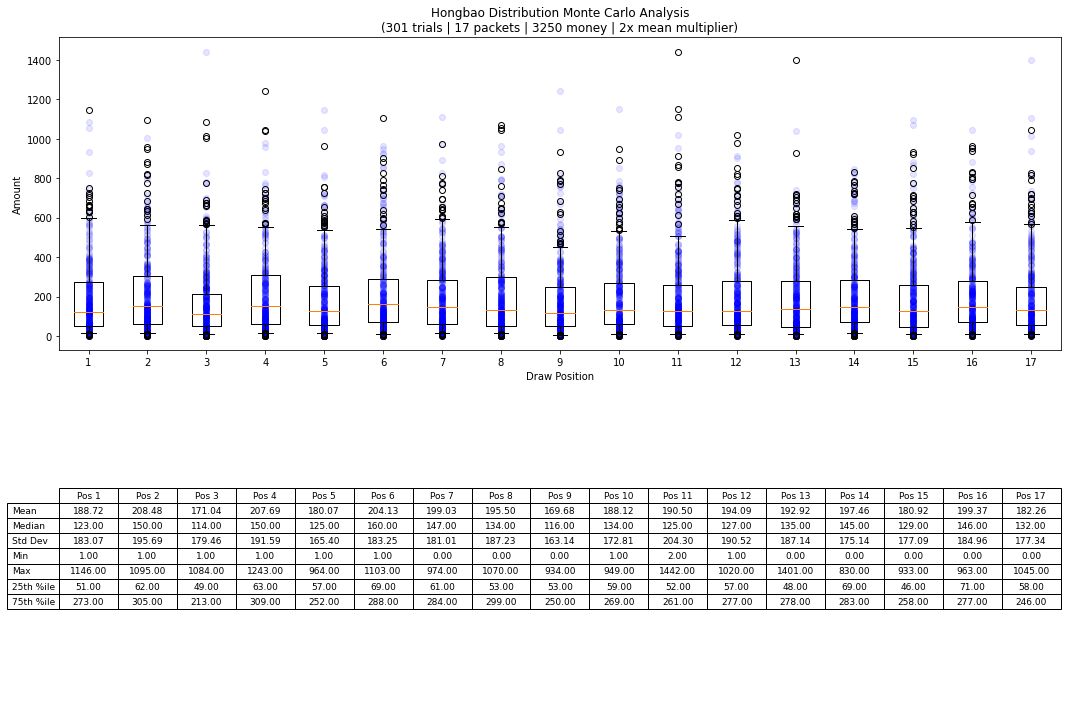

In [157]:
import re

# Generate this file with below command
# /opt/homebrew/bin/aptos move test --filter dirichlet::test_print_many_dirichlet_hongbao --skip-fetch-latest-git-deps --move-2 > test_output.txt
with open('test_output.txt', 'r') as file:
    data = file.read()
lines = data.strip().split("\n")

result = []

for line in lines:
    # Use regex to extract numbers inside brackets
    if "[debug]" in line:
        numbers = re.findall(r"\d+", line)
        result.append([int(num) for num in numbers])

print(f"Found {len(result)} test cases, of {len(result[0])} packets each.");
plot_results(np.array(result), MULTIPLIER)